<a href="https://colab.research.google.com/github/AtharvRaotole/FraudDetect-Handling-Imbalanced-Data-for-Credit-Card-Fraud-Detection/blob/main/credit_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


import warnings
warnings.filterwarnings("ignore")


In [29]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
df.describe

<bound method NDFrame.describe of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
83274  59766 -0.465927  0.740705  1.731343  0.036013  0.098876  0.055606   
83275  59767 -0.725577  0.379742  1.468039  1.356958  0.546077  0.109718   
83276  59768 -1.711347  1.308095 -0.232786 -1.607585 -1.299910 -0.627938   
83277  59768  1.471591 -1.234024  0.279178 -1.595504 -1.344324 -0.101130   
83278  59769  1.135220  0.124163  0.109082  0.902728  0.038998  0.004539   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
83274  0.472815  0.134921 -0.302919  ...  0.032294  0.287631 -0.337062   
83275  0.416071  0.180774 -0.273686  ...  0.006224  0.017405 -0.101053   
83276 -1.562053 -1.722859 -1.534618  ... -0.902970  1.269219  0.178712   
83277 -1.249330  0.030445 -1.813220  ...  0.000785  0.310947 -0.194016   
83278  0.007332  0.113029 -0.000000  ...       NaN       NaN       NaN   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50    0.0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99    0.0  
...         ...       ...       ...       ...       ...     ...    ...  
83274  0.079929  0.091760  0.396666  0.078020  0.093914    1.00    0.0  
83275 -0.294967  0.164357 -0.166337  0.114452  0.115366   46.96    0.0  
83276  0.527195 -0.313104 -0.365365  0.216308  0.181065   10.00    0.0  
83277 -0.504003  0.513079  0.008417  0.029493  0.007596   40.00    0.0  
83278       NaN       NaN       NaN       NaN       NaN     NaN    NaN  

[83279 rows x 31 columns]>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83279 entries, 0 to 83278
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    83279 non-null  int64  
 1   V1      83279 non-null  float64
 2   V2      83279 non-null  float64
 3   V3      83279 non-null  float64
 4   V4      83279 non-null  float64
 5   V5      83279 non-null  float64
 6   V6      83279 non-null  float64
 7   V7      83279 non-null  float64
 8   V8      83279 non-null  float64
 9   V9      83279 non-null  float64
 10  V10     83278 non-null  float64
 11  V11     83278 non-null  float64
 12  V12     83278 non-null  float64
 13  V13     83278 non-null  float64
 14  V14     83278 non-null  float64
 15  V15     83278 non-null  float64
 16  V16     83278 non-null  float64
 17  V17     83278 non-null  float64
 18  V18     83278 non-null  float64
 19  V19     83278 non-null  float64
 20  V20     83278 non-null  float64
 21  V21     83278 non-null  float64
 22

In [32]:
# Check for empty strings
print((df == "").sum())

# Check for 'NA', 'n/a', etc.
print((df == "NA").sum())
print((df == "n/a").sum())

# Check for leading/trailing whitespaces
print((df.applymap(lambda x: isinstance(x, str) and x.strip() == "")).sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V1

In [33]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.76 % of the dataset
Frauds 0.24 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

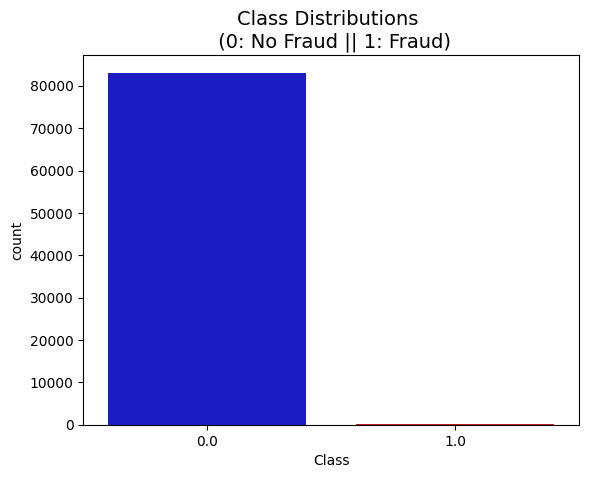

In [35]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x = 'Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [36]:
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())

Shape Of The Dataset (83279, 31)
Class Categories [ 0.  1. nan]
Number Of Records With The Class Value 0:  83077
Number Of Records With The Class Value 1:  201


In [37]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [38]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.494212,-2.147149,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.296089,-2.147149,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.285001,-2.147097,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.175947,-2.147097,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.523943,-2.147044,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


# Drop rows with NaN in 'Class' column
df.dropna(subset=['Class'], inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 99.76 % of the dataset
Frauds 0.24 % of the dataset
Train: [10497 10498 10568 ... 83275 83276 83277] Test: [    0     1     2 ... 16687 16688 16689]
Train: [    0     1     2 ... 83275 83276 83277] Test: [10497 10498 10568 ... 33332 33333 33334]
Train: [    0     1     2 ... 83275 83276 83277] Test: [17480 18466 18472 ... 49992 49993 49994]
Train: [    0     1     2 ... 83275 83276 83277] Test: [42756 42769 42784 ... 66628 66629 66630]
Train: [    0     1     2 ... 66628 66629 66630] Test: [58761 59539 61787 ... 83275 83276 83277]


In [40]:
# Remove the '.values' from all variables
original_Xtrain = original_Xtrain
original_Xtest = original_Xtest
original_ytrain = original_ytrain
original_ytest = original_ytest

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
# Calculate the percentage of each label in the training set
print(train_counts_label / len(original_ytrain) * 100)

# Calculate the percentage of each label in the testing set
print(test_counts_label / len(original_ytest) * 100)

----------------------------------------------------------------------------------------------------
Label Distributions: 

[99.75834171  0.24165829]
[99.75983188  0.24016812]


In [41]:
from imblearn.under_sampling import RandomUnderSampler
df2 = df.copy()
# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
y = df2['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
4415,0.188985,-1.948756,-5.391266,-7.236466,0.821766,-0.446688,8.489769,-1.051122,-5.248991,1.418887,...,2.193439,0.359073,-1.215088,1.269858,0.885497,0.607654,-0.470884,-0.242026,0.202143,0.0
26485,0.121604,-0.351494,0.983613,-0.603226,1.159121,-0.220913,-0.571505,1.469845,-1.154125,0.629490,...,-0.102453,0.336173,1.113044,0.094973,-0.857703,-0.254082,1.269280,0.036998,0.012477,0.0
6831,-0.274644,-1.691955,-0.391768,1.112687,1.331724,-0.078590,0.613770,0.113081,0.547001,0.027506,...,0.069694,-0.402231,-0.796684,-0.085369,-0.839376,-0.167752,0.113317,0.255546,0.103277,0.0
29870,0.789326,-0.268440,1.246610,-1.465909,0.890256,-1.413769,-1.786636,0.093609,-1.434109,0.182817,...,-0.187877,-0.071771,-0.004417,0.056711,-0.004467,0.026235,-0.257839,0.056441,0.032884,0.0
52462,1.242963,0.247163,1.034136,-1.006639,-0.589244,-0.830446,1.207681,3.915627,-1.074069,1.022988,...,0.290669,-0.214306,-0.782102,-0.061399,1.083509,0.251003,0.945002,-0.054213,0.028512,0.0


In [42]:
downsampled_df.shape

(402, 31)

<Axes: xlabel='Class', ylabel='count'>

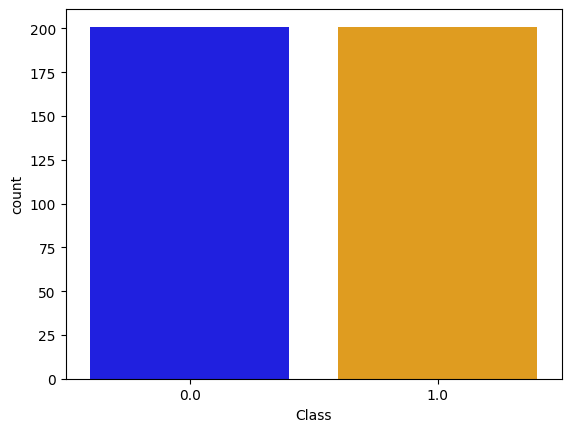

In [43]:
sns.countplot(x='Class', data=downsampled_df, palette=['blue', 'orange'])

In [44]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()




,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
51641,-0.170342,0.225675,-0.717835,0.838534,2.106044,1.062078,0.524462,1.620522,0.324002,0.557515,...,-0.057326,-0.017424,0.276680,-0.096727,-0.634162,0.014812,-0.193919,0.173628,0.071029,0.0
40913,0.158523,-0.016537,1.178549,-0.040722,-0.060345,1.054820,-0.034307,0.010372,-0.112960,0.146635,...,-0.259475,0.031216,-0.042059,-0.180403,-0.840265,0.601427,-0.192839,0.008018,0.010078,0.0
70182,-0.295967,0.683608,-0.847074,-0.277187,2.213393,-2.467773,-1.146423,-0.833251,-0.460146,-0.038493,...,-0.222018,-0.058718,0.287735,-0.146619,0.356983,0.447158,-0.175249,0.200215,0.112176,0.0
81174,-0.024248,0.950467,1.289269,-0.543004,0.564959,-0.821009,-0.839168,-0.218556,-0.671493,0.056403,...,0.118049,-0.001473,-0.130855,0.130068,0.021588,0.143815,-0.471451,0.024090,0.013198,0.0
74818,-0.209699,0.790151,1.274460,-0.312713,0.827146,-0.038882,-0.765409,0.032647,-0.666464,0.062085,...,0.004736,-0.165704,-0.252316,-0.051286,-0.350154,0.244451,1.039762,-0.031456,0.009450,0.0


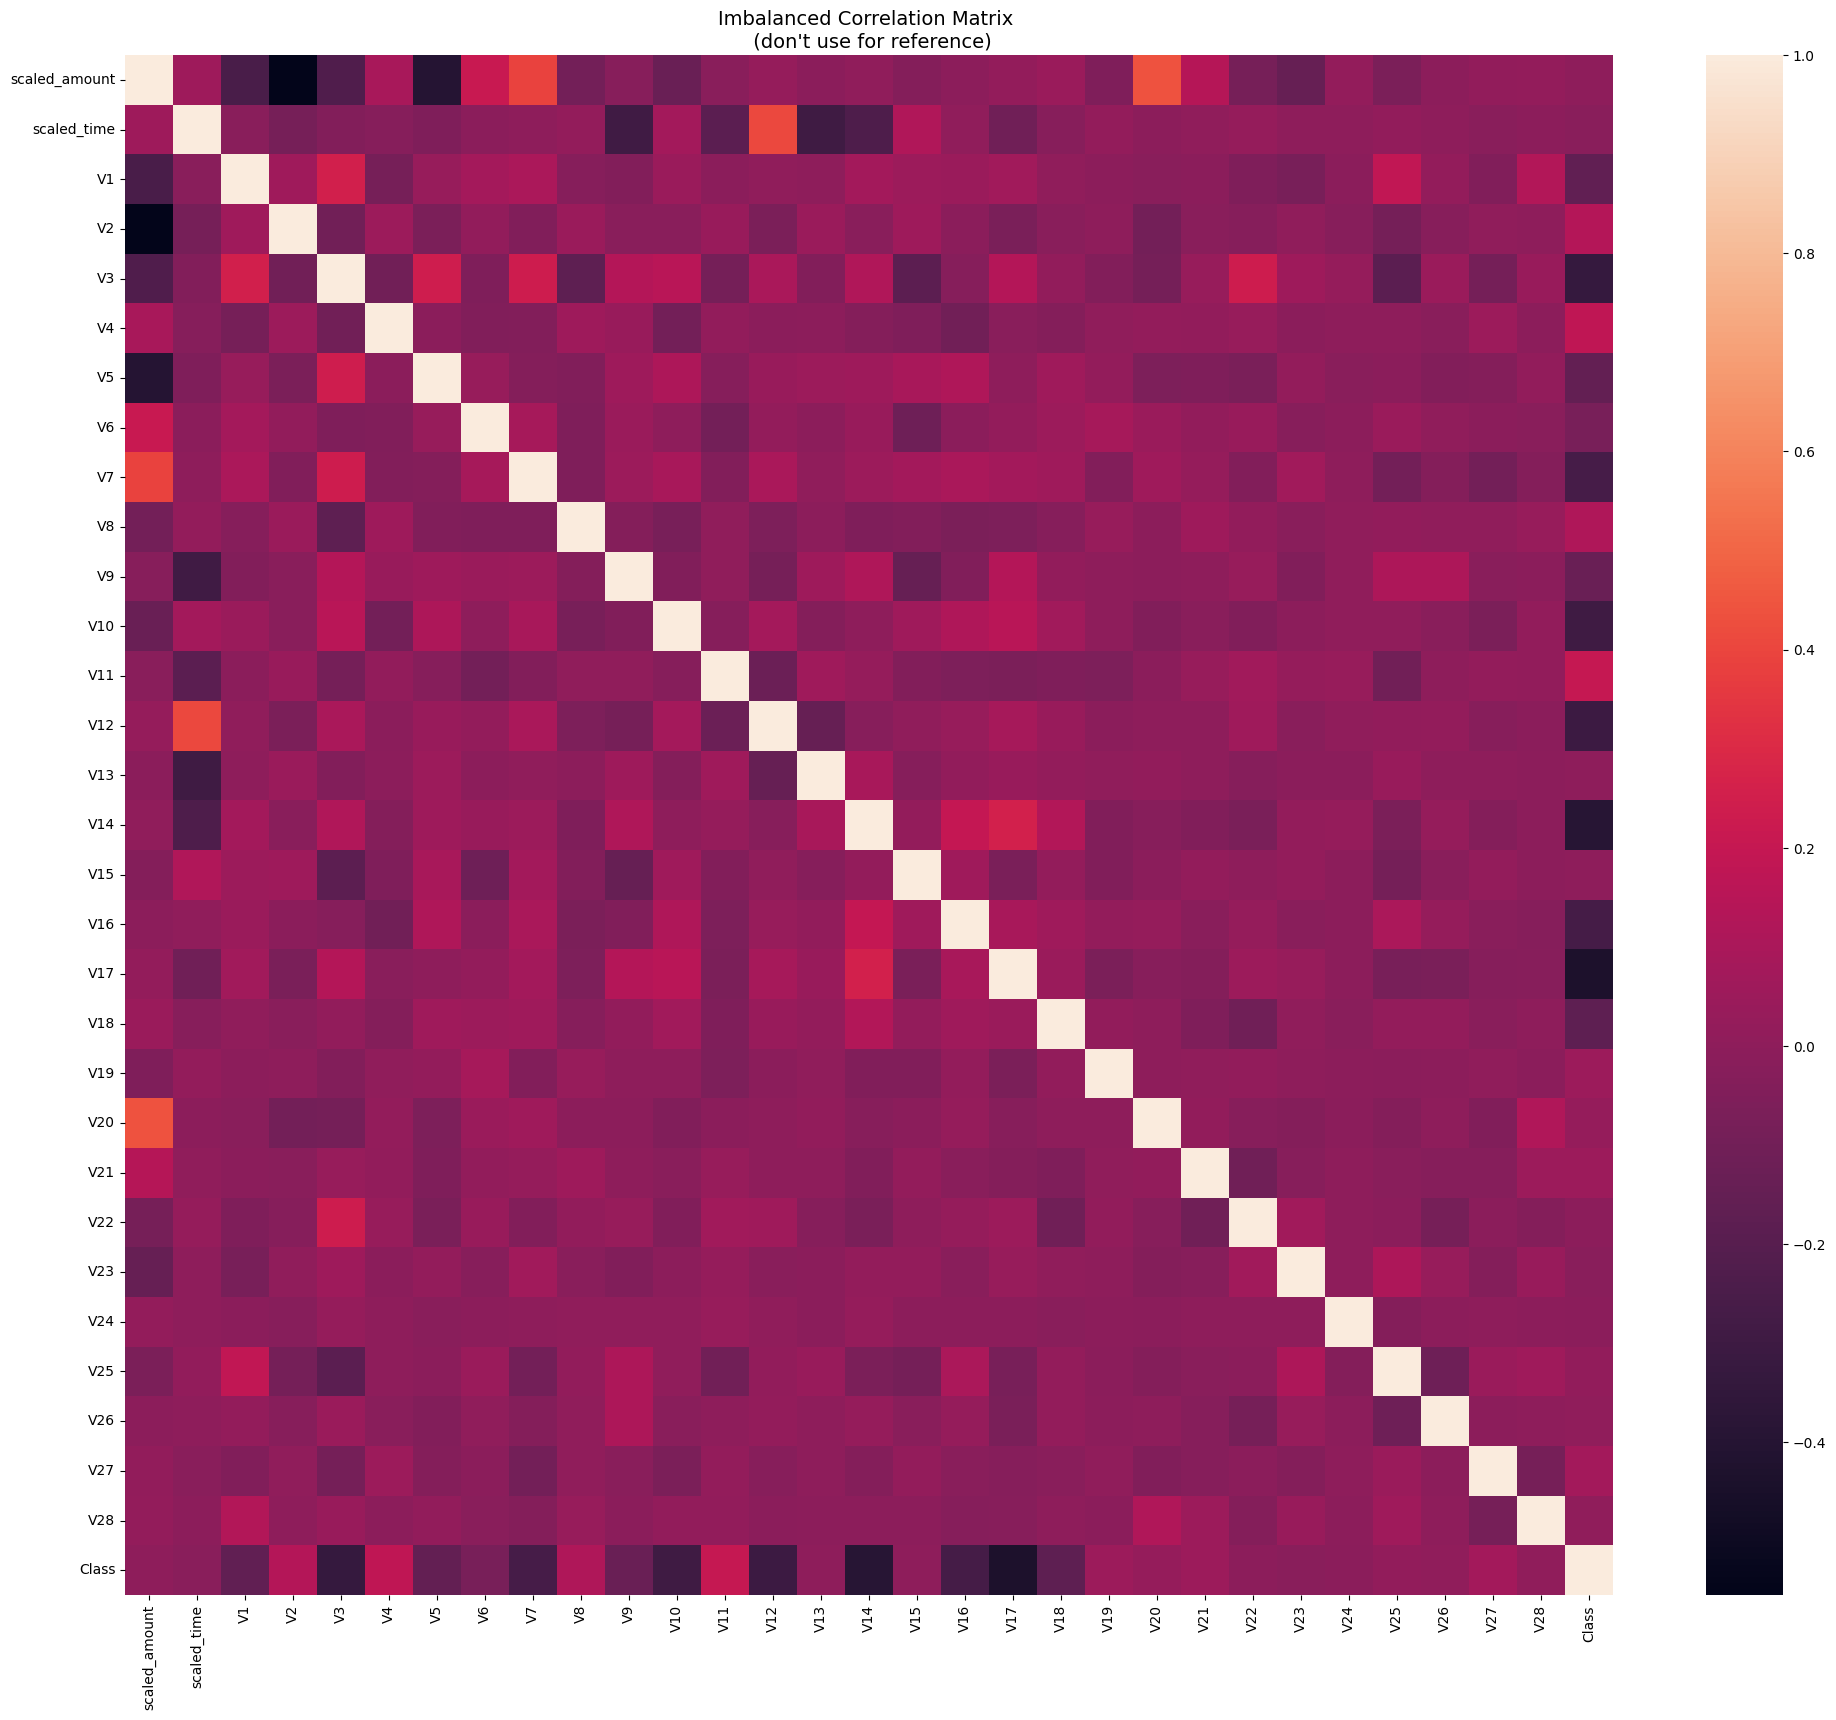

In [45]:
corr = df.corr()

# Create a figure and axes
f, ax1 = plt.subplots(1, 1, figsize=(24, 20))

# Plot the heatmap for the correlation matrix
sns.heatmap(corr, annot_kws={'size': 20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Show the plot
plt.show()

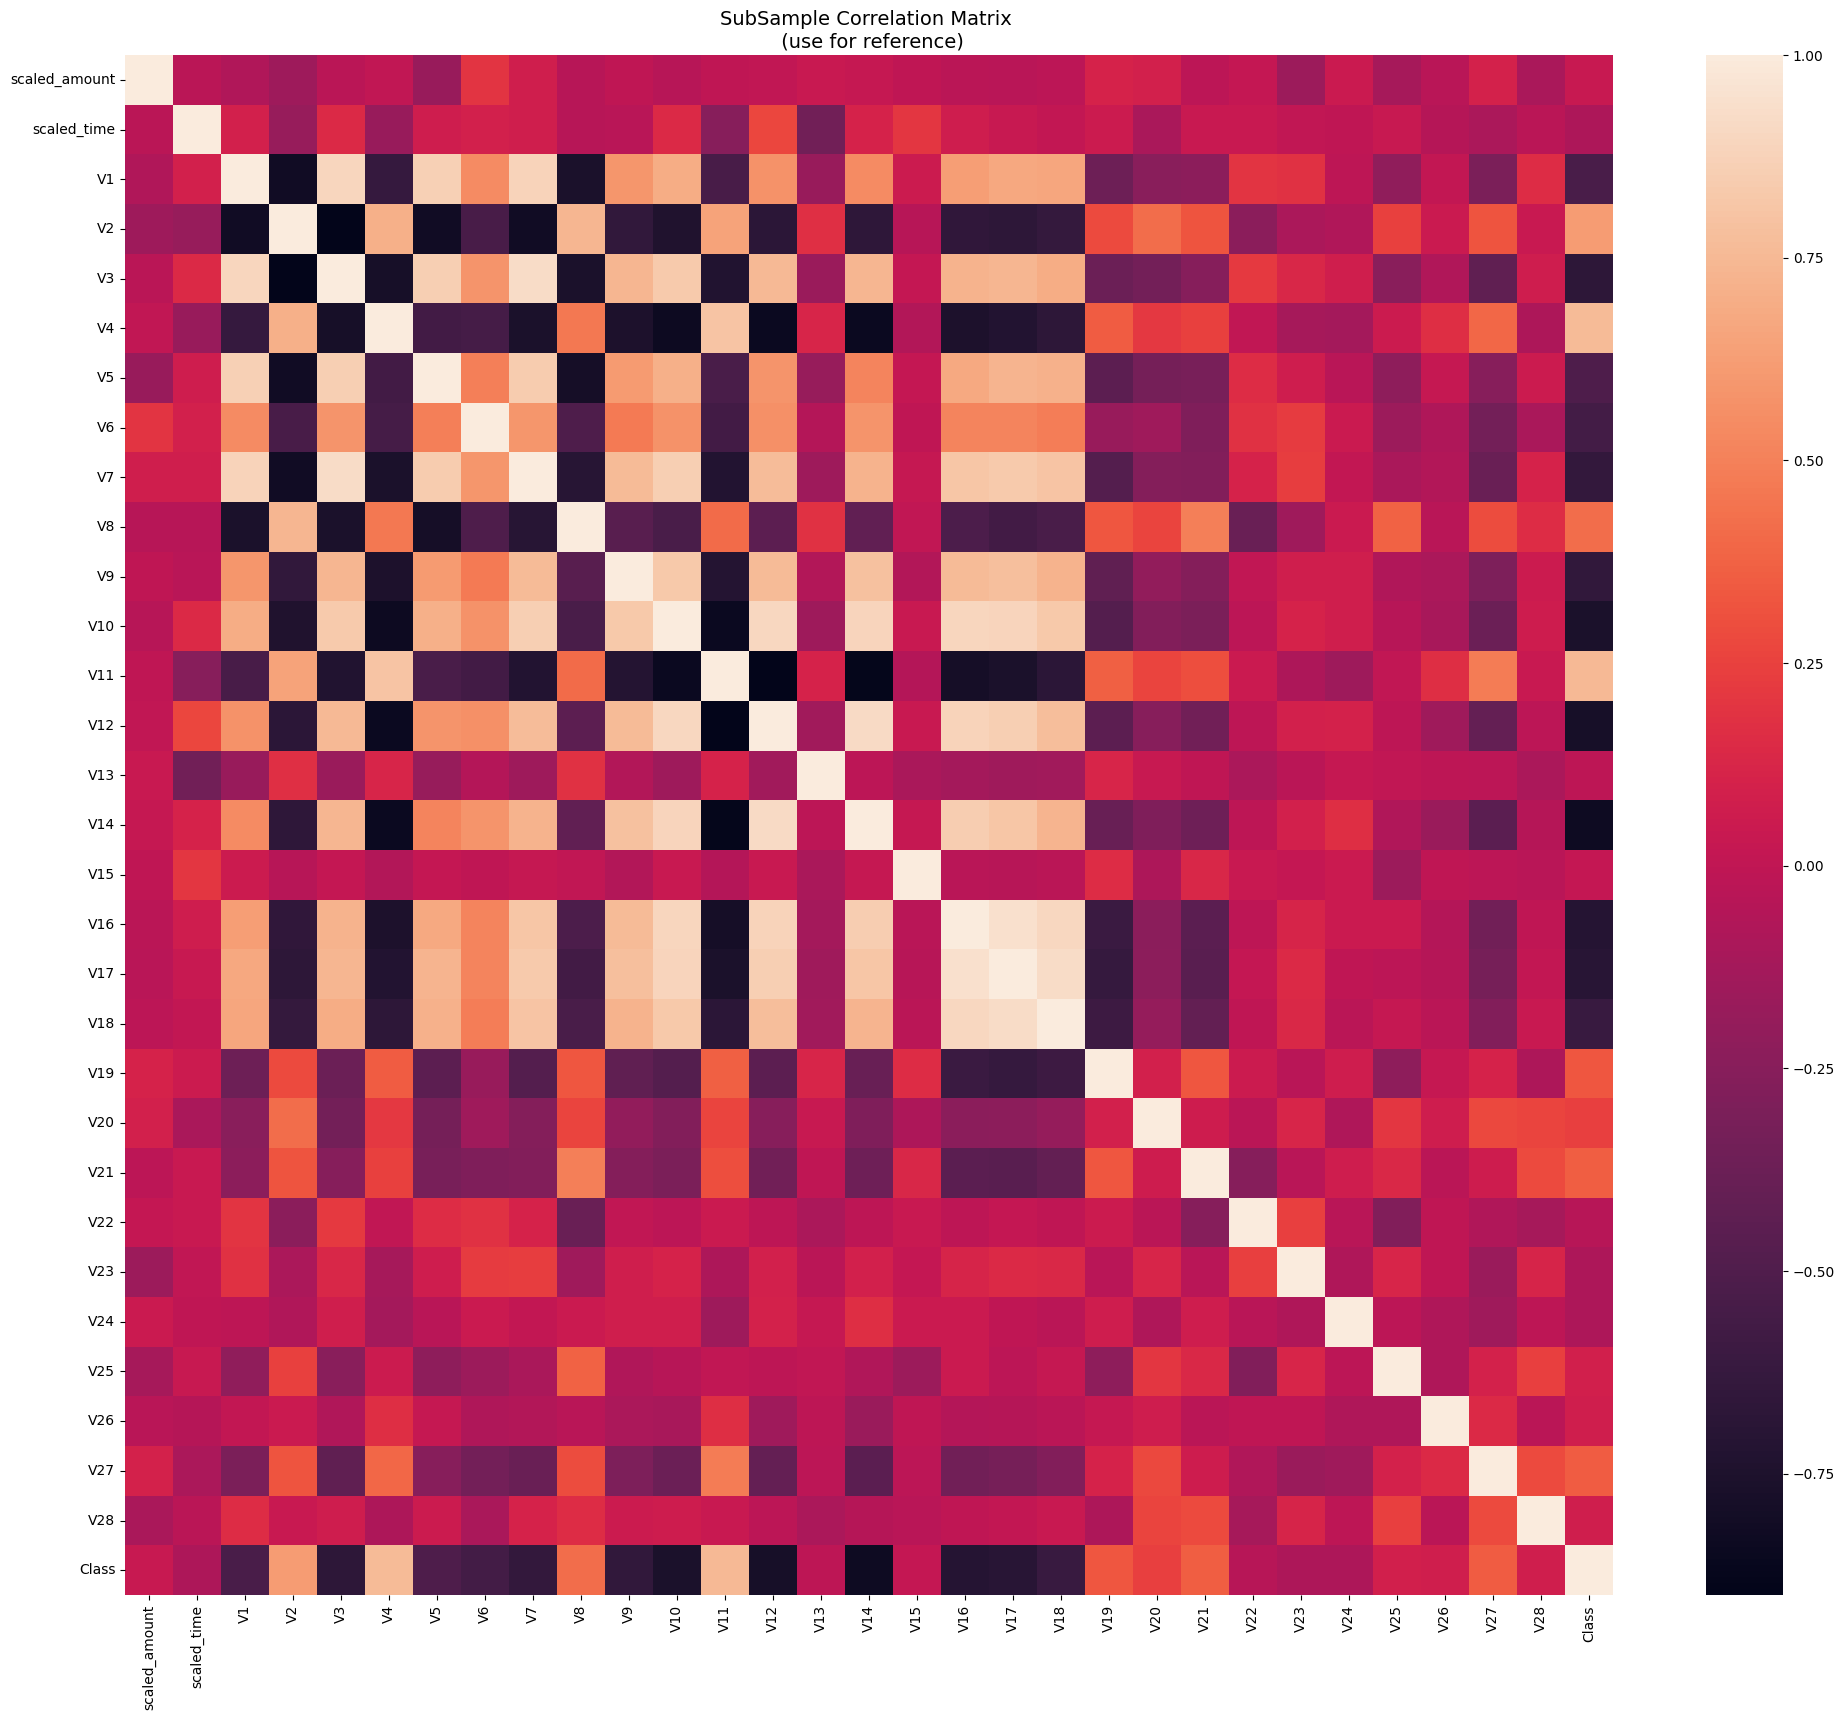

In [46]:
sub_sample_corr = new_df.corr()

# Assuming sub_sample_corr is your correlation matrix DataFrame
plt.figure(figsize=(24, 20))  # Set the figure size
sns.heatmap(sub_sample_corr, annot_kws={'size': 20})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [47]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [48]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [50]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [51]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 96.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score
Classifiers:  SVC Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 93.0 % accuracy score


In [52]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [53]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  96.57%
Knears Neighbors Cross Validation Score 96.21%
Support Vector Classifier Cross Validation Score 96.39%
DecisionTree Classifier Cross Validation Score 95.13%


In [54]:
from sklearn.metrics import classification_report


# Generate predictions
y_pred_log_reg = log_reg.predict(X_test)  # Predict using the trained model
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        98
         1.0       1.00      0.85      0.92        41

    accuracy                           0.96       139
   macro avg       0.97      0.93      0.95       139
weighted avg       0.96      0.96      0.96       139

KNears Neighbors:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        98
         1.0       1.00      0.85      0.92        41

    accuracy                           0.96       139
   macro avg       0.97      0.93      0.95       139
weighted avg       0.96      0.96      0.96       139

Support Vector Classifier:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        98
         1.0       0.97      0.85      0.91        41

    accuracy                           0.95       139
   macro avg       0.96      0.92      0.94       139
weighted